# Data Preprocessing

In [130]:
import pandas as pd

In [131]:
# loading the data into a dataframe
path = "https://raw.githubusercontent.com/10Dennisw/house-price-prediction/main/datasets/HousingPrices-Amsterdam-August-2021.csv"
df = pd.read_csv(path)

In [132]:
df.drop('Unnamed: 0', axis=1, inplace=True) # dropping initial column which contains 
df

,Address,Zip,Price,Area,Room,Lon,Lat
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...
919,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [133]:
df.shape

(924, 7)

### Data Cleaning

In [134]:
# checking for duplicates
duplicates = df.duplicated()
df[duplicates]

,Address,Zip,Price,Area,Room,Lon,Lat
909,"Quashibastraat, Amsterdam",1087 VS,348738.0,79,4,5.016555,52.350513


In [135]:
df.loc[df['Address'] == "Quashibastraat, Amsterdam"] # printing the row for a further look

,Address,Zip,Price,Area,Room,Lon,Lat
908,"Quashibastraat, Amsterdam",1087 VS,348738.0,79,4,5.016555,52.350513
909,"Quashibastraat, Amsterdam",1087 VS,348738.0,79,4,5.016555,52.350513


In [136]:
df = df.drop_duplicates(keep='last') # keep last occurance of the duplicate rows

In [137]:
df.isnull().sum() # looking for missing values

Address    0
Zip        0
Price      4
Area       0
Room       0
Lon        0
Lat        0
dtype: int64

In [138]:
df[df.isnull().any(axis=1)] # printing the rows with missing values

,Address,Zip,Price,Area,Room,Lon,Lat
73,"Falckstraat 47 A, Amsterdam",1017 VV,NaN,147,3,4.897454,52.360707
321,"Haarlemmerweg 705, Amsterdam",1067 HP,NaN,366,12,4.787874,52.383877
610,"Zeeburgerkade 760, Amsterdam",1019 HT,NaN,107,3,4.945022,52.369244
727,"Suikerplein 16, Amsterdam",1013 CK,NaN,81,3,4.880976,52.389623


In [139]:
df = df.dropna() # dropping missing values

In [140]:
df.dtypes # checking datatypes

Address     object
Zip         object
Price      float64
Area         int64
Room         int64
Lon        float64
Lat        float64
dtype: object

In [141]:
df['Area Code'] = df['Zip'].astype(str).str[:4] #splitting the Zip the create an area code
df['Area Code'] = df['Area Code'].astype(int)
df

,Address,Zip,Price,Area,Room,Lon,Lat,Area Code
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157,1091
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586,1059
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782,1097
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712,1060
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538,1036
...,...,...,...,...,...,...,...,...
919,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173,1097
920,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587,1033
921,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256,1058
922,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268,1095


In [142]:
# seeing how many times each area code appears in the df
counts = df['Area Code'].value_counts() 
print(f"--> The median times an area code appears is: {counts.median()}") # printing median times
counts

--> The median times an area code appears is: 12.5


Area Code
1017    31
1055    29
1068    26
1053    26
1018    25
        ..
1023     4
1108     3
1028     2
1109     2
1022     1
Name: count, Length: 70, dtype: int64

### Feature Engineering

In [143]:
# definining the boroughs of amsterdam with the area codes 
boroughs_df = pd.DataFrame([
    [1011, 1019, "Centrum"], [1020, 1039, "Noord"], [1040, 1049, "Westpoort"], 
    [1050, 1059, "West"], [1060, 1069, "Nieuw West"], [1070, 1083, "Zuid"], 
    [1086, 1099, "Oost"], [1100, 1109, "Zuidoost"]],
    columns = ['lower_limit', 'upper_limit', 'district_name']) 

boroughs_df

,lower_limit,upper_limit,district_name
0,1011,1019,Centrum
1,1020,1039,Noord
2,1040,1049,Westpoort
3,1050,1059,West
4,1060,1069,Nieuw West
5,1070,1083,Zuid
6,1086,1099,Oost
7,1100,1109,Zuidoost


In [144]:
# creating a new column for the borough through apply and lambda method
df['Borough'] = df['Area Code'].apply(lambda x: boroughs_df.loc[
    (boroughs_df['lower_limit'] <= x) & (boroughs_df['upper_limit'] >= x), 
    'district_name'].values[0]
    )
df

,Address,Zip,Price,Area,Room,Lon,Lat,Area Code,Borough
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157,1091,Oost
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586,1059,West
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782,1097,Oost
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712,1060,Nieuw West
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538,1036,Noord
...,...,...,...,...,...,...,...,...,...
919,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173,1097,Oost
920,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587,1033,Noord
921,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256,1058,West
922,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268,1095,Oost


### Exploratory Data Analysis

In [145]:
import matplotlib.pyplot as plt

In [146]:
total_outlier_list = []

In [147]:
def plotting_boxplot_and_histogram(df, col_name):
    # Adjust the size of the entire figure
    plt.figure(figsize=(12, 5))  # Example size: 10 inches by 5 inches

    # Plot 1: Boxplot
    plt.subplot(1, 2, 1) 
    df.boxplot(column=[col_name])
    plt.title('Boxplot of Variable ' + col_name)

    # Plot 2: Histogram
    plt.subplot(1, 2, 2) 
    plt.hist(df[col_name], bins=20, edgecolor='black', alpha=0.7)
    plt.title('Histogram of Variable ' + col_name)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    # Display the plots
    plt.show()

In [148]:
def finding_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_whisker = Q3 + 1.5 * IQR
    lower_whisker = Q1 - 1.5 * IQR

    # Identifying the outliers, which are above or below the IQR
    outliers = df[(df[column_name] > upper_whisker) | (df[column_name] < lower_whisker)]
    
    # Counting points
    points_above = outliers[column_name][outliers[column_name] > upper_whisker].count()
    points_below = outliers[column_name][outliers[column_name] < lower_whisker].count()
    
    points_above = df[column_name][df[column_name] > upper_whisker].count()
    points_below = df[column_name][df[column_name] < lower_whisker].count()
    print(f"The number of points above: {points_above}")
    print(f"The number of points below: {points_below}")
    print(f"--> Total Number of Outliers: {points_above + points_below}")

    outlier_indices = outliers.index # saving the indices
    return outlier_indices

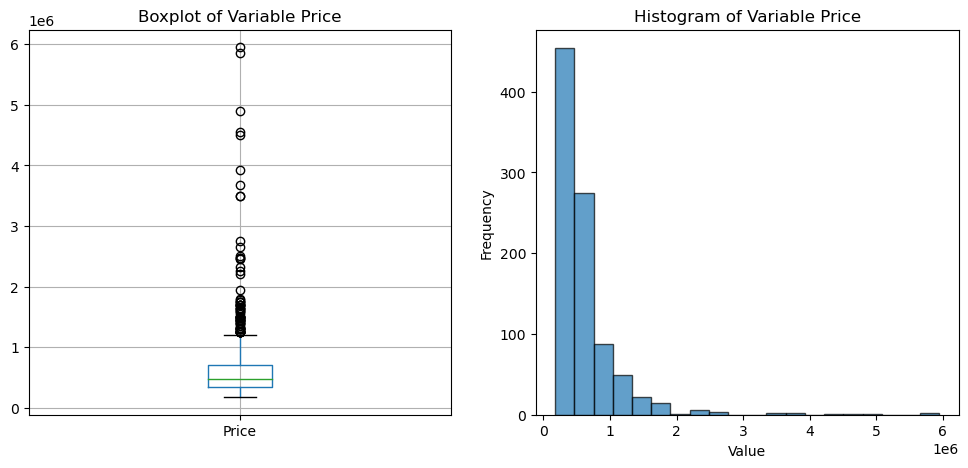

In [149]:
plotting_boxplot_and_histogram(df, 'Price')

In [150]:
outlier_indices = finding_outliers(df, 'Price')
outlier_indices_list = outlier_indices.tolist()

total_outlier_list.extend(outlier_indices_list)

The number of points above: 71
The number of points below: 0
--> Total Number of Outliers: 71


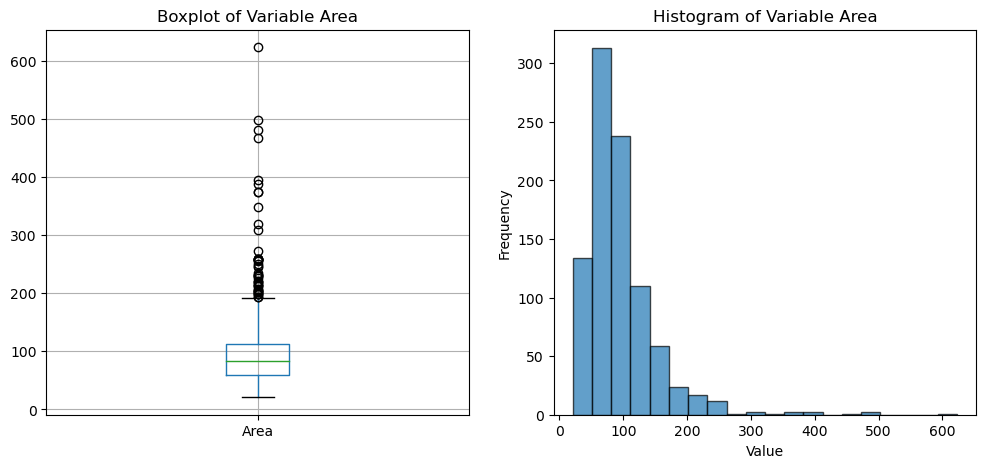

In [151]:
plotting_boxplot_and_histogram(df, 'Area')

In [152]:
outlier_indices = finding_outliers(df, 'Area')
outlier_area_list = outlier_indices.tolist()

# adding only new indices to the outlier list
for i in outlier_area_list:
    if i in total_outlier_list:
        pass
    else:
        total_outlier_list.append(i)

The number of points above: 46
The number of points below: 0
--> Total Number of Outliers: 46


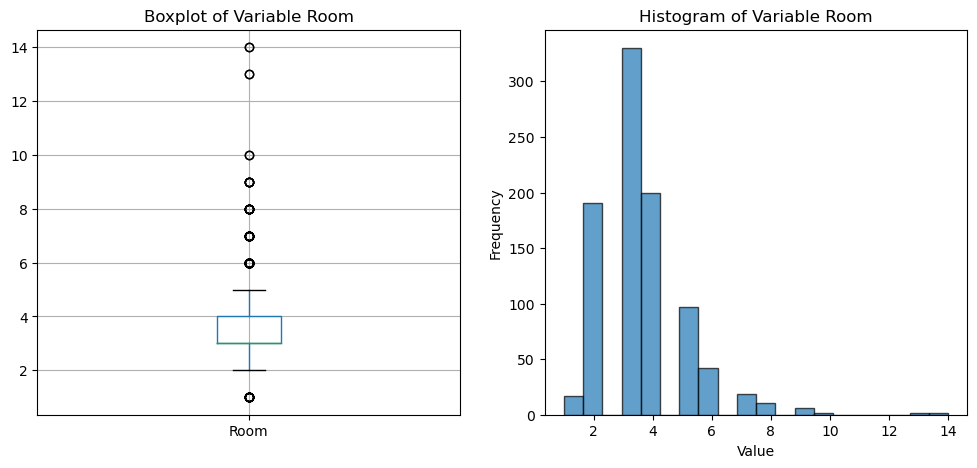

In [153]:
plotting_boxplot_and_histogram(df, 'Room')

In [154]:
outlier_indices = finding_outliers(df, 'Room')
outlier_area_list = outlier_indices.tolist()

# adding only new indices to the outlier list
for i in outlier_area_list:
    if i in total_outlier_list:
        pass
    else:
        total_outlier_list.append(i)

The number of points above: 84
The number of points below: 17
--> Total Number of Outliers: 101


In [155]:
print(f"The total number of outliers found is {len(total_outlier_list)}")

The total number of outliers found is 140


### Feature Transformation

In [156]:
import numpy as np

In [157]:
total_outlier_list = []

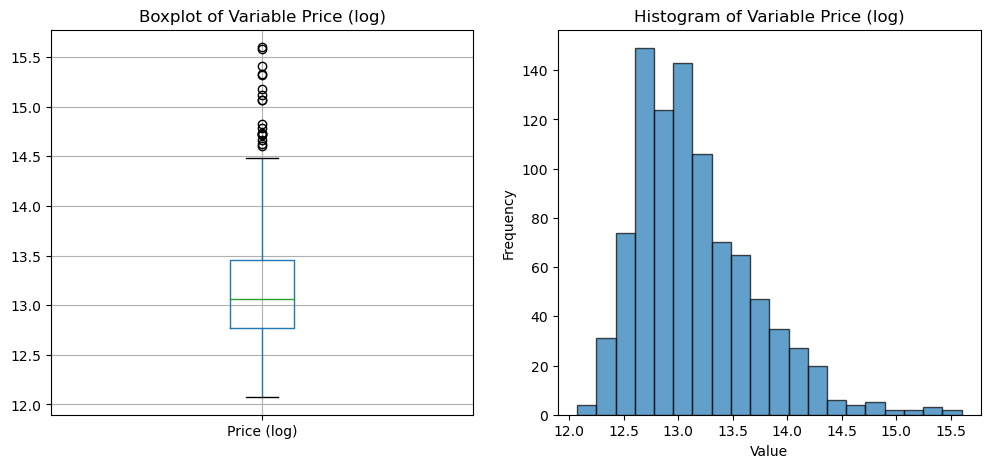

In [158]:
df['Price (log)'] = np.log(df['Price'])
plotting_boxplot_and_histogram(df, 'Price (log)')

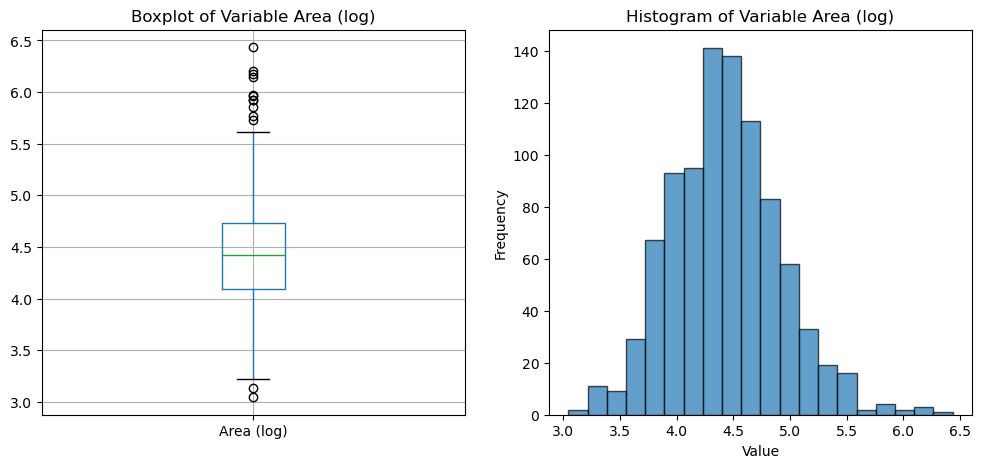

In [159]:
df['Area (log)'] = np.log(df['Area'])
plotting_boxplot_and_histogram(df, 'Area (log)')

### Correlation Analysis

In [160]:
import seaborn as sns

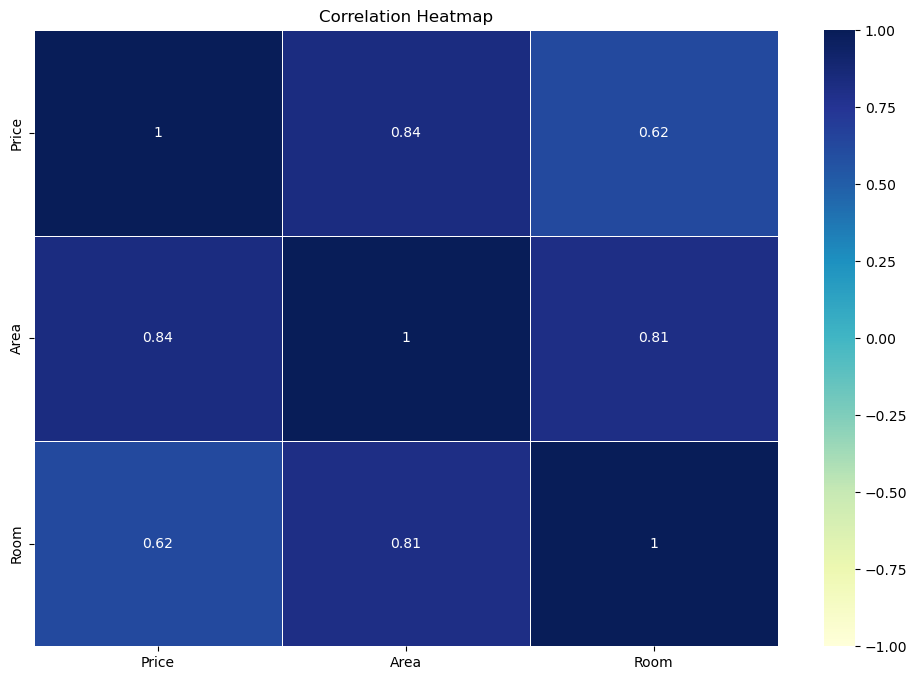

In [161]:
selected_columns_df = df[['Price','Area','Room']]

# Calculate the correlation matrix
corr = selected_columns_df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='YlGnBu', linewidths=.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### Visualisation

In [162]:
import plotly.express as px

In [163]:
# Access token
px.set_mapbox_access_token('pk.eyJ1IjoiZGVubmlzd2lua2xlcjY4IiwiYSI6ImNsa3R5YnlsbzBoMTMza3BuY2Y2ZGpmdTYifQ.MNqZ4oP1LXDEIwXLcLX39g')

# Specifying the data which should be shown
fig = px.scatter_mapbox(df, lat="Lat", lon="Lon",
                        color="Price",
                        size='Price',
                        color_discrete_map=["fuchsia"],
                        zoom=9.8, height=500)


# Specifying Map Type
fig.update_layout(
    mapbox_style="light",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "Amsterdam Property Information",
        }
      ])

fig.show()

In [164]:
# Sort the DataFrame by the 'Price' column in descending order
df_sorted = df.sort_values(by='Price', ascending=False)

# Select the top 50 records
df_top50 = df_sorted.head(50)
df_top50['Highest/Lowest 50'] = 'Highest'

df_sorted = df.sort_values(by='Price', ascending=True)

# Select the top 50 records
df_low50 = df_sorted.head(50)
df_low50['Highest/Lowest 50'] = 'Lowest'

df_combined = pd.concat([df_top50, df_low50], ignore_index=True)

C:\Users\denni\AppData\Local\Temp\ipykernel_3916\1929554574.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\denni\AppData\Local\Temp\ipykernel_3916\1929554574.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [165]:
# Specifying the data which should be shown
fig = px.scatter_mapbox(df_combined, lat="Lat", lon="Lon",
                        color="Highest/Lowest 50",
                        color_discrete_map={'Highest': 'green', 'Lowest': 'red'},
                        zoom=9.8, 
                        height=500
                        )


# Specifying Map Type
fig.update_layout(
    mapbox_style="light",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "Amsterdam Property Information",
        }
      ])

In [166]:
df['Index'] = df.index

In [167]:
fig = px.scatter_mapbox(df, lat="Lat", lon="Lon",
                        color="Borough",
                        zoom=9.8, 
                        height=500,
                        hover_data=['Index']
                        )


# Specifying Map Type
fig.update_layout(
    mapbox_style="light",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "Amsterdam Property Information",
        }
      ])

In [168]:
index_to_drop_lst = [212, 627]
index_to_change_lst = [236]

# these indexes need to be dropped as the houses are in Haarlem not Amsterdam
df = df.drop(index_to_drop_lst, inplace=False)

df_slice = df.loc[df['Index'] == 236]
df_slice

,Address,Zip,Price,Area,Room,Lon,Lat,Area Code,Borough,Price (log),Area (log),Index
236,"Van der Hoopstraat 33 A2, Amsterdam",1051 VB,425000.0,56,2,4.943696,52.338795,1051,West,12.959844,4.025352,236


In [169]:
# after investigation seems to be a mistake for the longitude and lattiude
# new longitude and lattitude found on https://www.latlong.net/
new_lat = 52.384330
new_lon = 4.874410

# Updating coordinates
df.loc[df['Index'] == 236, 'Lat'] = new_lat
df.loc[df['Index'] == 236, 'Lon'] = new_lon

df

,Address,Zip,Price,Area,Room,Lon,Lat,Area Code,Borough,Price (log),Area (log),Index
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157,1091,Oost,13.437174,4.158883,0
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586,1059,West,13.071070,4.094345,1
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782,1097,Oost,13.652992,4.691348,2
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712,1060,Nieuw West,13.270783,4.852030,3
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538,1036,Noord,13.487006,4.927254,4
...,...,...,...,...,...,...,...,...,...,...,...,...
919,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173,1097,Oost,13.527828,4.762174,919
920,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587,1033,Noord,12.765688,4.276666,920
921,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256,1058,West,12.765688,3.931826,921
922,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268,1095,Oost,13.303017,4.727388,922


### Saving DataFrame

In [170]:
df.to_csv("datasets/amsterdam-house-prices-clean.csv", index=False)